<a href="https://colab.research.google.com/github/pdpavandesai/MergingDiabetesData/blob/main/MustafaDatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from scipy.stats import f_oneway, chi2_contingency
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving By Mohd. Mustafa.csv to By Mohd. Mustafa.csv


In [3]:
mustafaDataset_Actual = pd.read_csv('By Mohd. Mustafa.csv')
mustafaDataset_Actual_Copy = mustafaDataset_Actual.copy()
print('Actual shape of dataset before any processing: ',mustafaDataset_Actual.shape)
actual_Rows = mustafaDataset_Actual_Copy.shape[0]
mustafaDataset_Actual_Copy = mustafaDataset_Actual_Copy.drop_duplicates()
print('Shape of dataset after removing the duplicates: ',mustafaDataset_Actual_Copy.shape)
rows_AfterDeleting_Duplicates = mustafaDataset_Actual_Copy.shape[0]
print('No.of Duplicate rows in the Ishan Dutta''s Dataset = ', (actual_Rows - rows_AfterDeleting_Duplicates))

Actual shape of dataset before any processing:  (100000, 9)
Shape of dataset after removing the duplicates:  (96146, 9)
No.of Duplicate rows in the Ishan Duttas Dataset =  3854


In [ ]:
mustafaDataset_Actual_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [ ]:
mustafaDataset_Actual_Copy.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
mustafaDataset_Actual_Copy.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [ ]:
mustafaDataset_Actual_Copy.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
mustafaDataset_Actual_Copy.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


# Distribution of target-feature 'diabetes'

Text(0.5, 1.0, 'Distribution of Diabetes in the dataset')

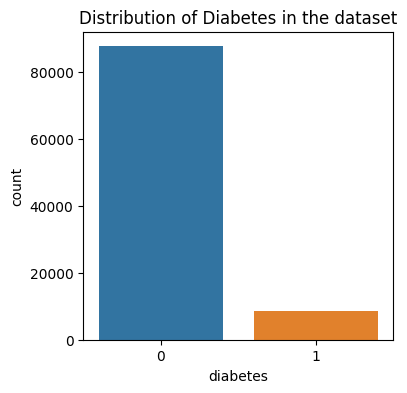

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='diabetes')
plt.title('Distribution of Diabetes in the dataset')

# Relation(Visual) of Continuous variables ['age','bmi','HbA1c_level','blood_glucose_level']

Text(0.5, 1.0, 'Distribution of BMI in the dataset')

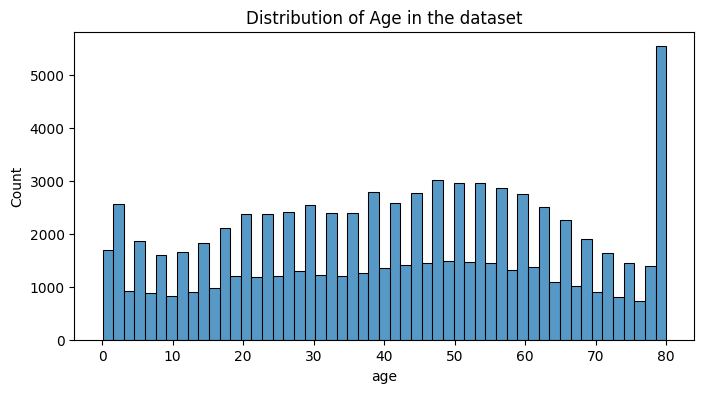

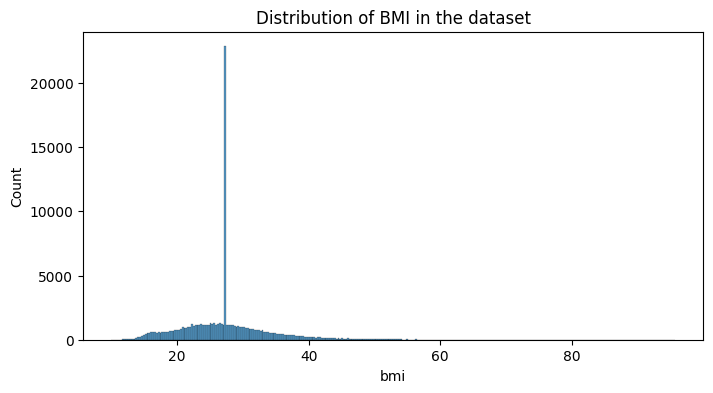

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=mustafaDataset_Actual_Copy,x='age')
plt.title('Distribution of Age in the dataset')

plt.figure(figsize=(8,4))
sns.histplot(data=mustafaDataset_Actual_Copy,x='bmi')
plt.title('Distribution of BMI in the dataset')

Text(0.5, 1.0, 'Distribution of Age in the dataset')

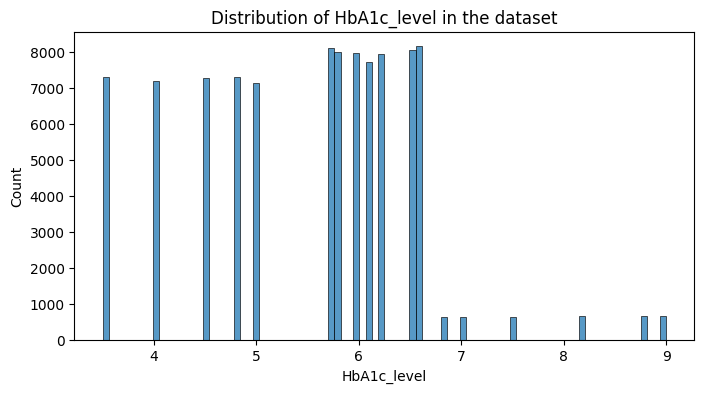

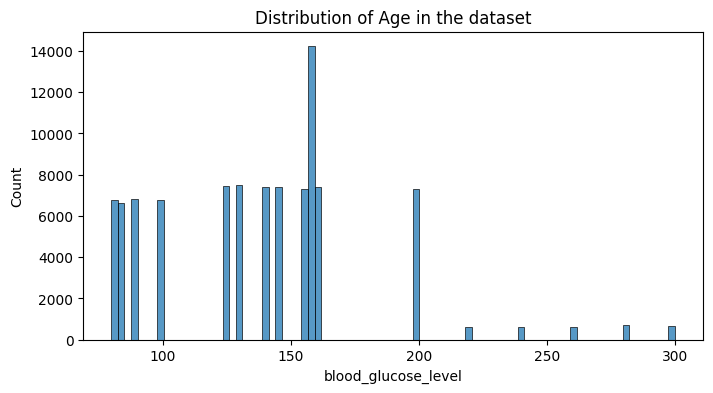

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=mustafaDataset_Actual_Copy,x='HbA1c_level')
plt.title('Distribution of HbA1c_level in the dataset')

plt.figure(figsize=(8,4))
sns.histplot(data=mustafaDataset_Actual_Copy,x='blood_glucose_level')
plt.title('Distribution of Age in the dataset')

# Understanding how continuous varibles ['age','bmi','HbA1c_level','blood_glucose_level'] are influencing diabetes(Visual Analysis)

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t BMI')

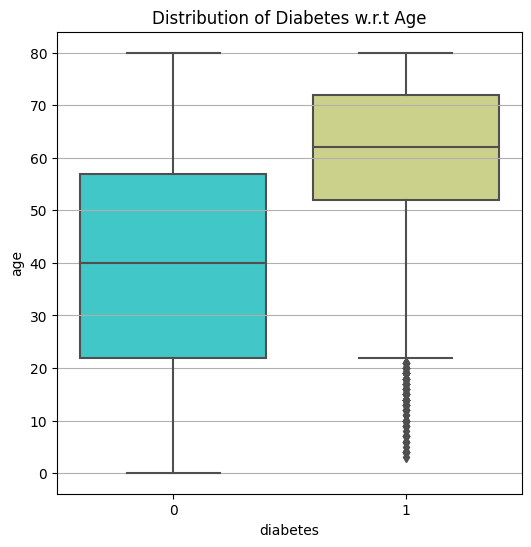

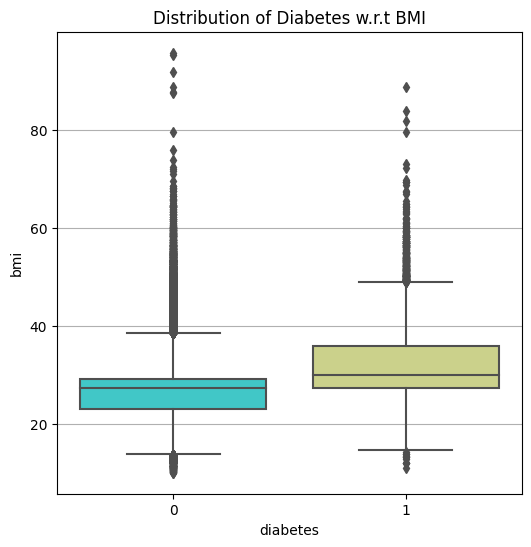

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='age',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Age')

plt.figure(figsize=(6,6))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='bmi',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t BMI')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Blood glucose level')

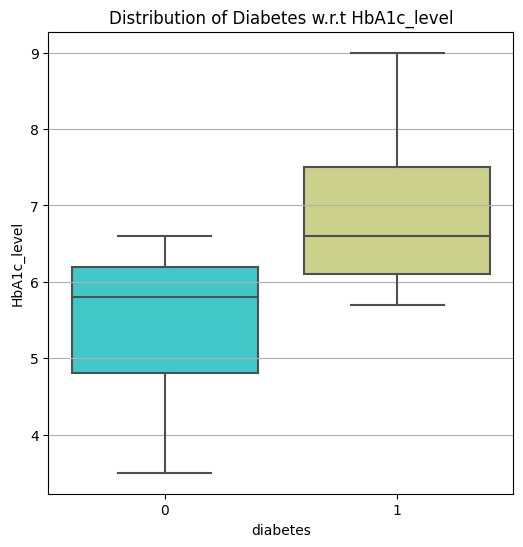

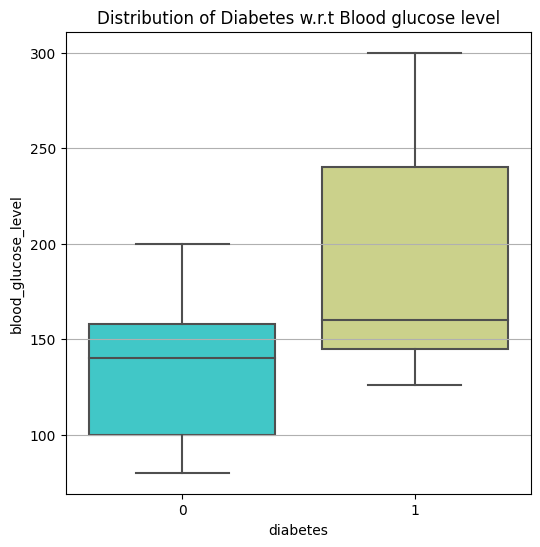

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='HbA1c_level',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t HbA1c_level')

plt.figure(figsize=(6,6))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='blood_glucose_level',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Blood glucose level')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Age & BMI')

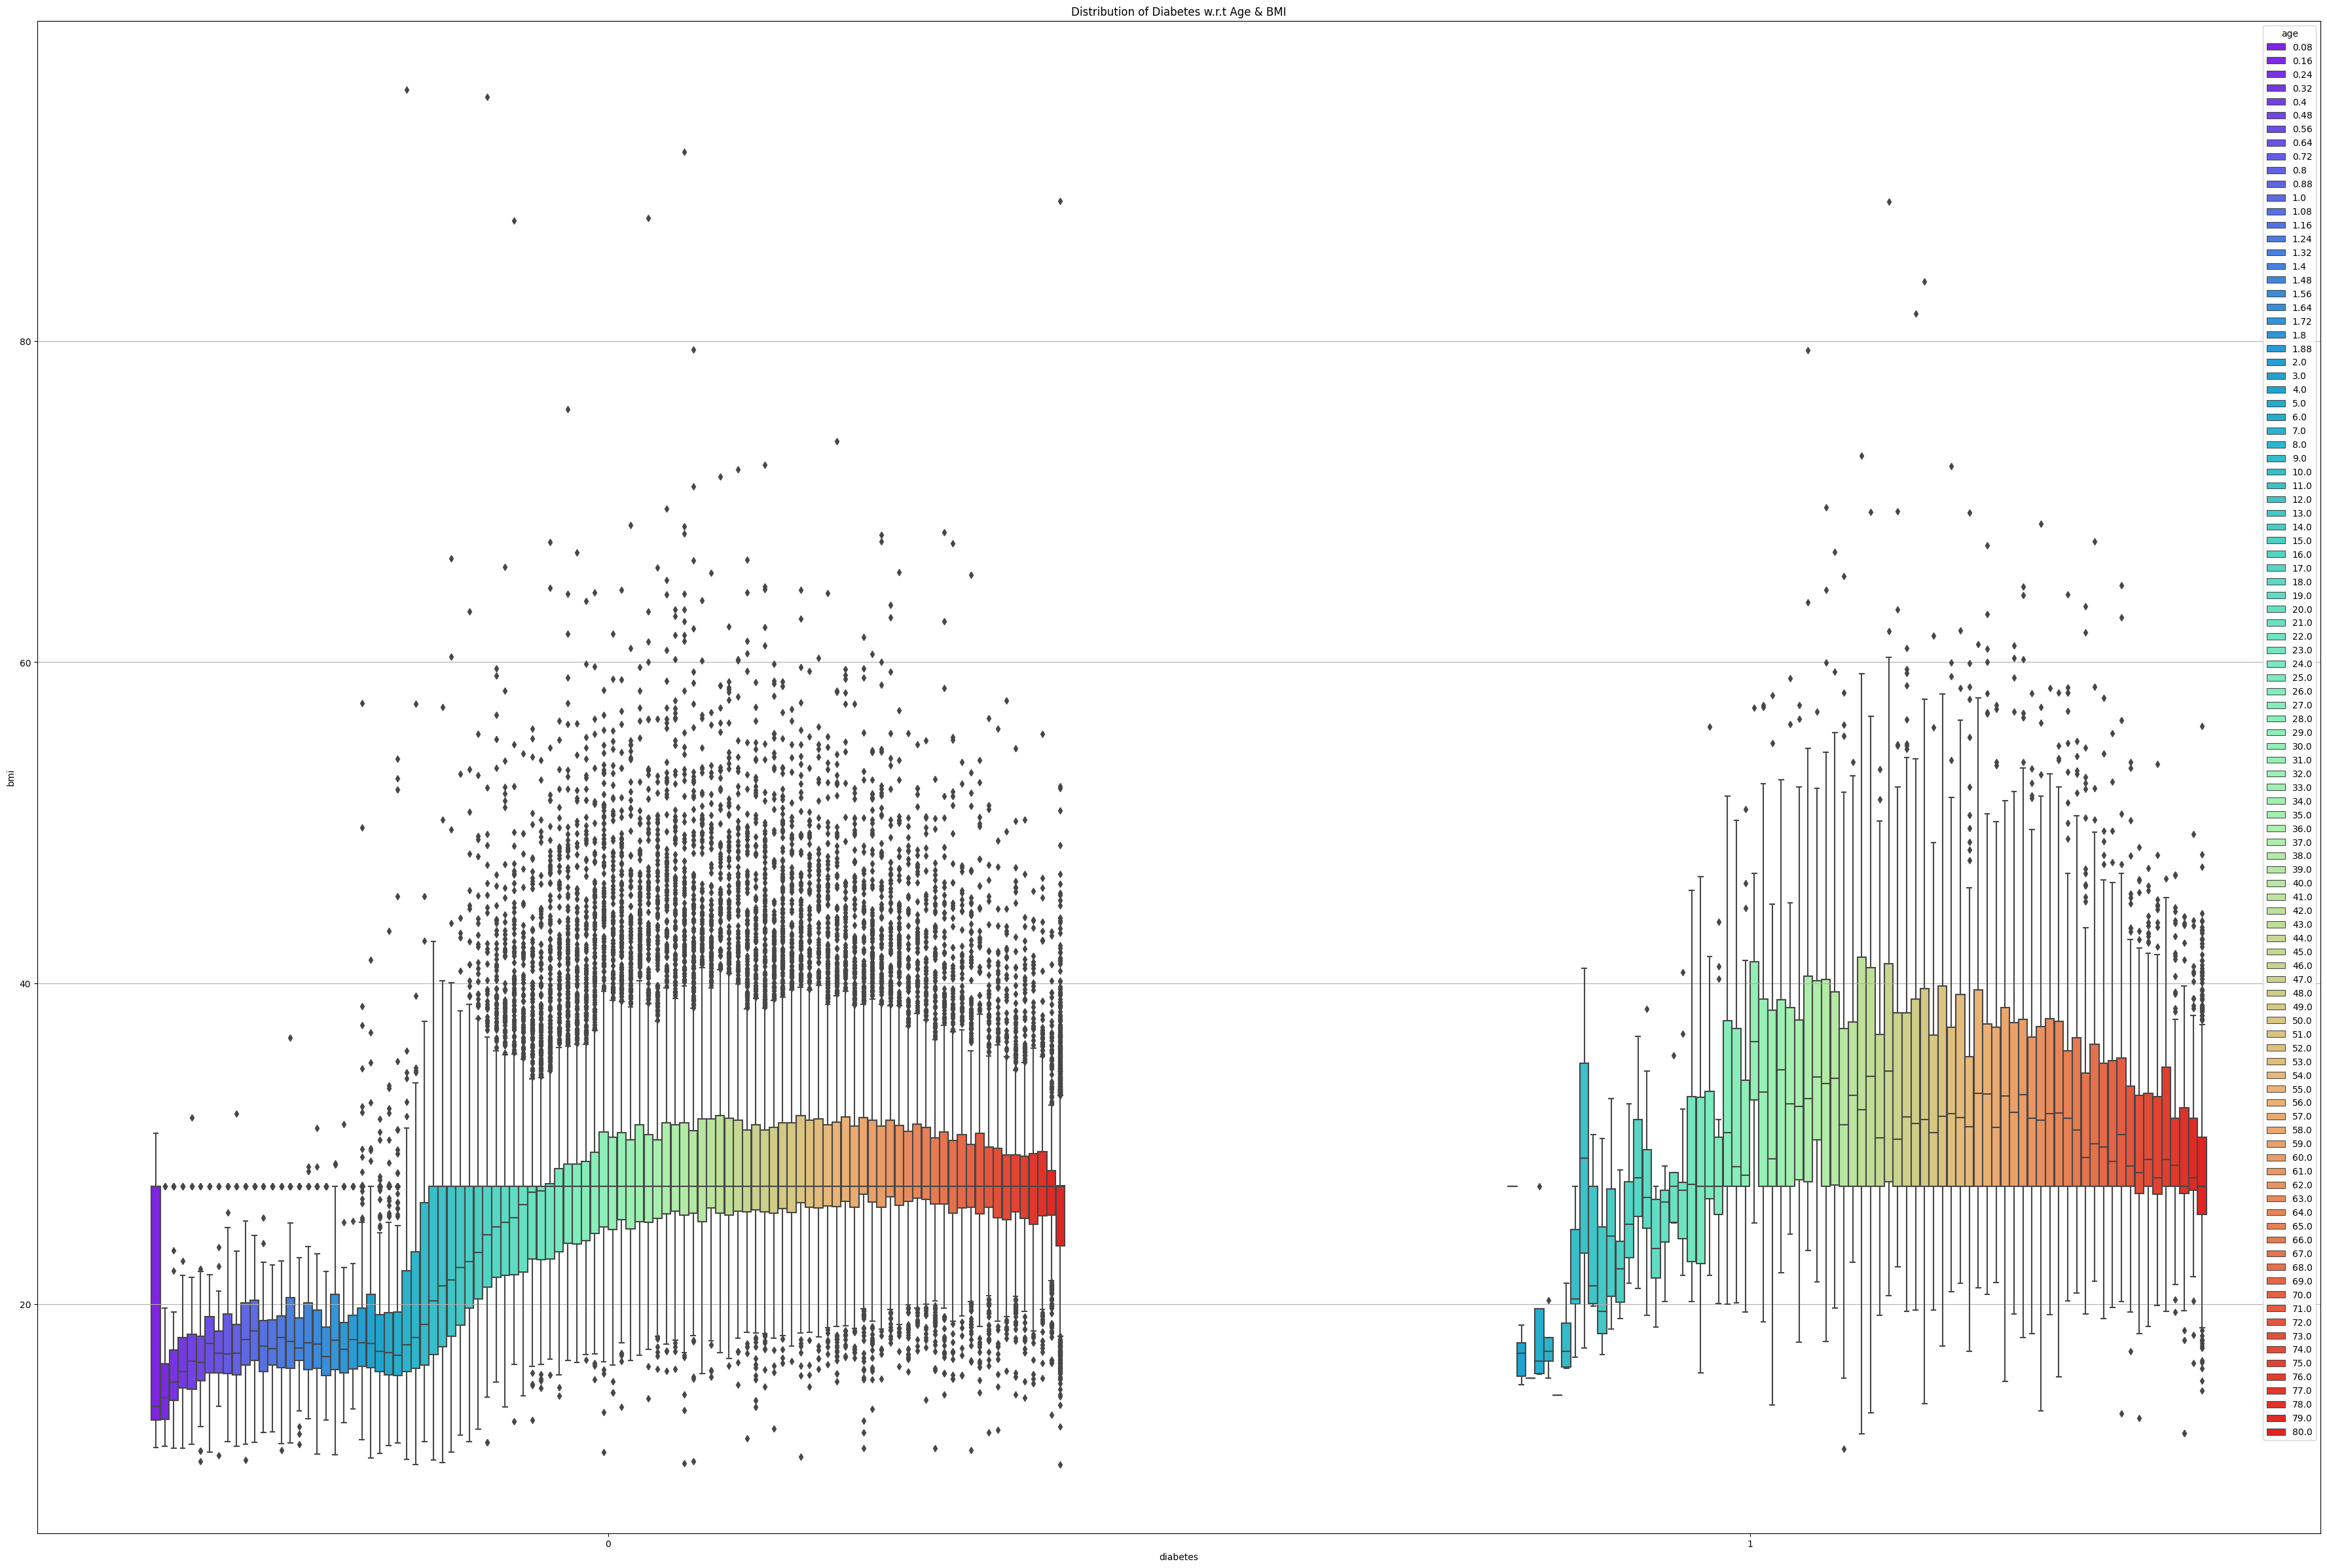

In [ ]:
plt.figure(figsize=(45,30))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='bmi',hue='age',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Age & BMI')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Age & HbA1c_level')

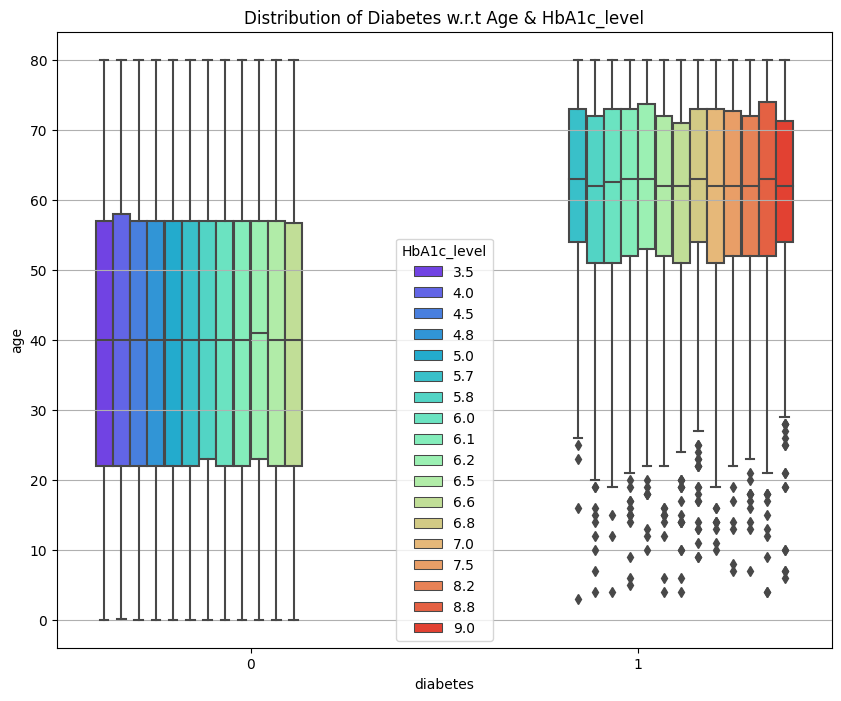

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='age',hue='HbA1c_level',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Age & HbA1c_level')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Age & Blood glucose level')

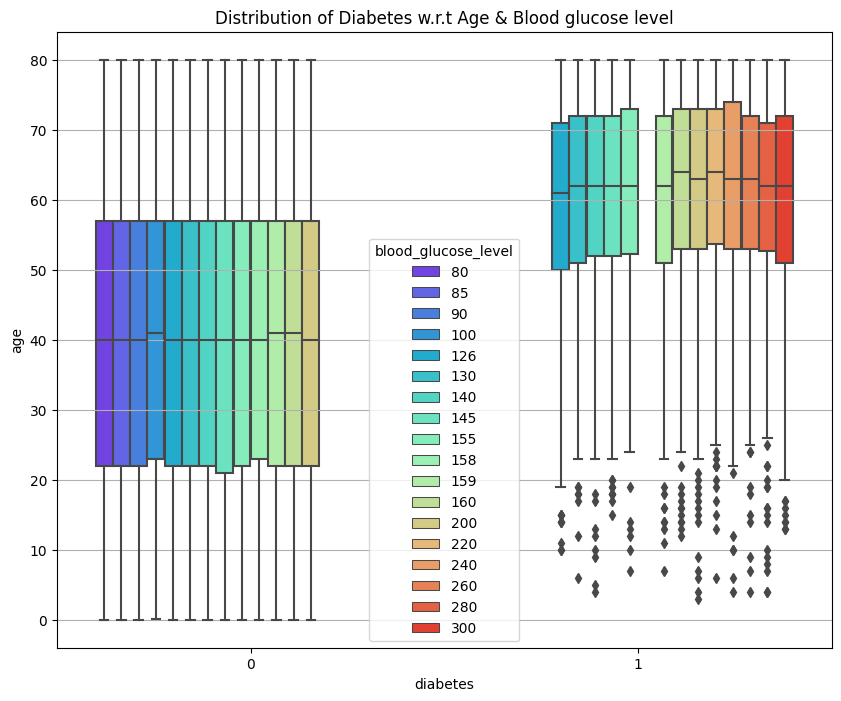

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=mustafaDataset_Actual_Copy,x='diabetes',y='age',hue='blood_glucose_level',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Age & Blood glucose level')

# Understanding the variation in target-feature diabetes w.r.t ['age','bmi','HbA1c_level','blood_glucose_level'] using ANOVA test(statistical test)

In [ ]:
def FunctionAnova(inputData, targetFeature, predictorVariables):
  selectedPredictors = []
  for predictor in predictorVariables:
    categoryGroupLists = inputData.groupby(targetFeature)[predictor].apply(list)
    anovaResults = f_oneway(*categoryGroupLists)
    if(anovaResults[1] < 0.05):
      print(predictor, ' is correlated with the target-variable ', targetFeature, ' with p-value: ', round(anovaResults[1],50))
      selectedPredictors.append(predictor)
    else:
      print(predictor, ' is NOT correlated with the target-variable ', targetFeature, ' with p-value: ', round(anovaResults[1],50))
  return selectedPredictors

In [ ]:
probablePredictorVariables = ['age','bmi','HbA1c_level','blood_glucose_level']
FunctionAnova(inputData=mustafaDataset_Actual_Copy, targetFeature='diabetes', predictorVariables=probablePredictorVariables)

age  is correlated with the target-variable  diabetes  with p-value:  0.0
bmi  is correlated with the target-variable  diabetes  with p-value:  0.0
HbA1c_level  is correlated with the target-variable  diabetes  with p-value:  0.0
blood_glucose_level  is correlated with the target-variable  diabetes  with p-value:  0.0


['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Relation(Visual) of Categorical variables ['hypertension','heart_disease','smoking_history','Gender']

Text(0.5, 1.0, 'Distribution of people suffering with heart disease in the dataset')

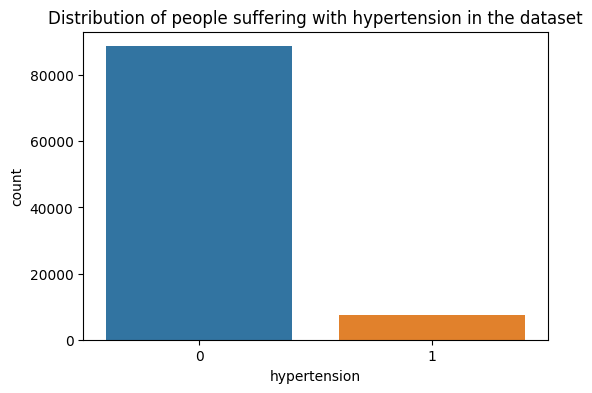

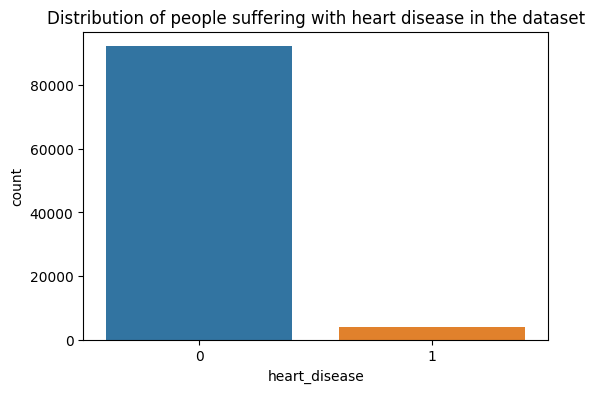

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='hypertension')
plt.title("Distribution of people suffering with hypertension in the dataset")

plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='heart_disease')
plt.title("Distribution of people suffering with heart disease in the dataset")

Text(0.5, 1.0, 'Distribution of gender in the dataset')

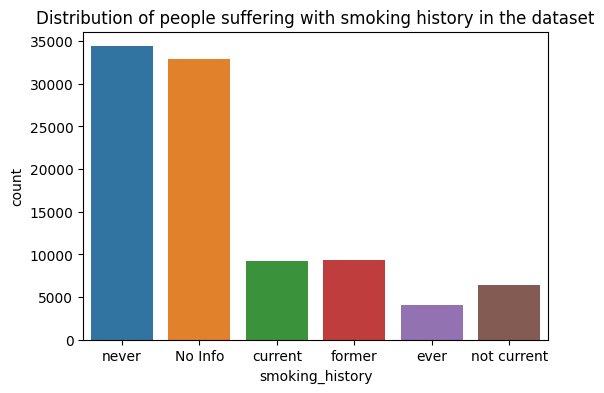

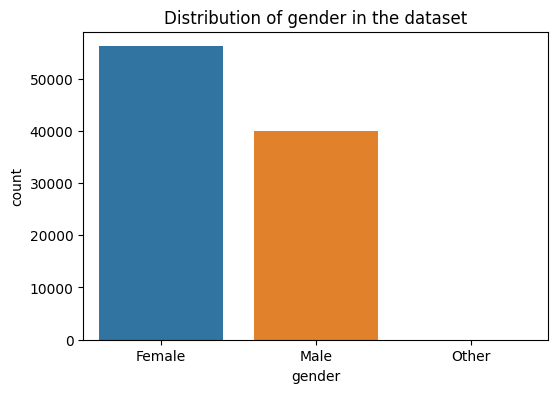

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='smoking_history')
plt.title("Distribution of people suffering with smoking history in the dataset")

plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='gender')
plt.title("Distribution of gender in the dataset")

# Understanding how categorical variables ['hypertension','heart_disease','smoking_history','Gender'] are influencing diabetes(Visual analysis)

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t people suffering with heart-disease')

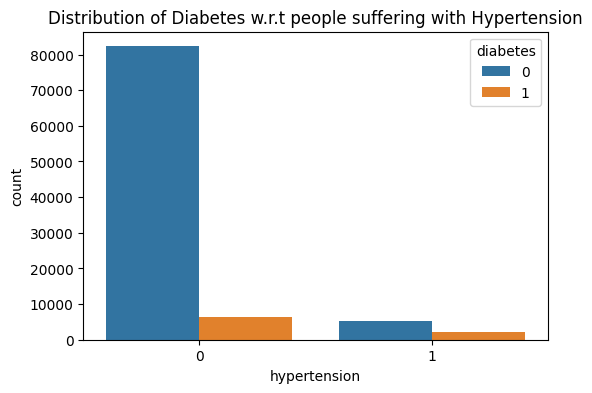

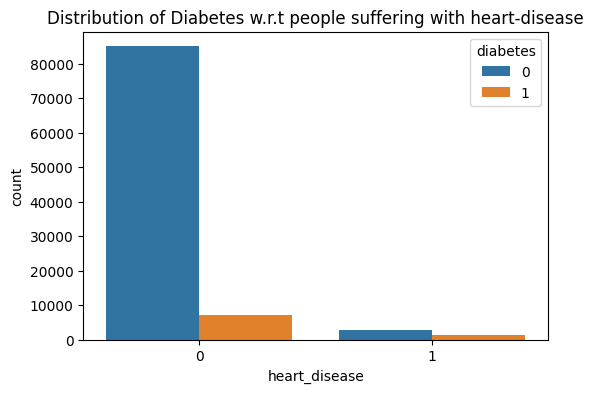

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='hypertension',hue='diabetes')
plt.title('Distribution of Diabetes w.r.t people suffering with Hypertension')

plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='heart_disease',hue='diabetes')
plt.title('Distribution of Diabetes w.r.t people suffering with heart-disease')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Gender')

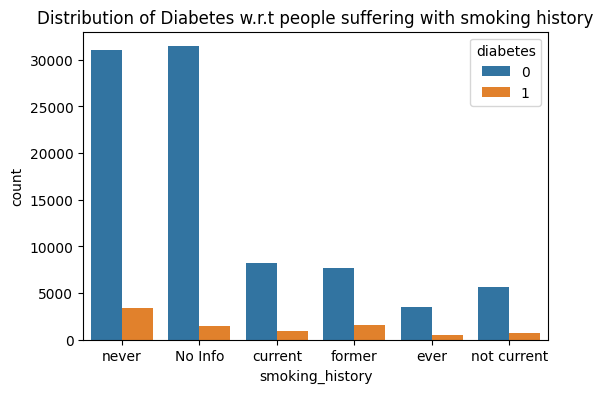

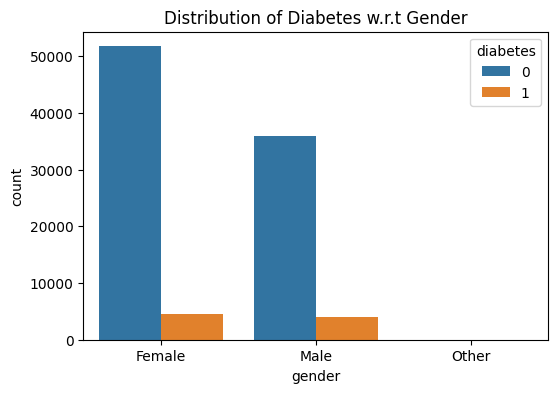

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='smoking_history',hue='diabetes')
plt.title('Distribution of Diabetes w.r.t people suffering with smoking history')

plt.figure(figsize=(6,4))
sns.countplot(data=mustafaDataset_Actual_Copy,x='gender',hue='diabetes')
plt.title('Distribution of Diabetes w.r.t Gender')

In [ ]:

def chiSquareTestFunction(inputData, targetFeature, predictorVariables):
  selectedPredictors=[]
  for predictor in predictorVariables:
    crossTableResults = pd.crosstab(index=inputData[targetFeature],columns=inputData[predictor])
    chisquareResult = chi2_contingency(crossTableResults)
    if(chisquareResult[1] < 0.05):
      print(predictor, ' is correlated with the target-variable ', targetFeature, ' with p-value: ', round(chisquareResult[1],50))
      selectedPredictors.append(predictor)
    else:
      print(predictor, ' is NOT correlated with the target-variable ', targetFeature, ' with p-value: ', round(chisquareResult[1],50))
  return selectedPredictors

In [ ]:
probableCategoricalPredictorVariables = ['hypertension','heart_disease','smoking_history','gender']
chiSquareTestFunction(inputData=mustafaDataset_Actual_Copy, targetFeature='diabetes', predictorVariables=probableCategoricalPredictorVariables)

hypertension  is correlated with the target-variable  diabetes  with p-value:  0.0
heart_disease  is correlated with the target-variable  diabetes  with p-value:  0.0
smoking_history  is correlated with the target-variable  diabetes  with p-value:  0.0
gender  is correlated with the target-variable  diabetes  with p-value:  5.4063313009771595e-31


['hypertension', 'heart_disease', 'smoking_history', 'gender']

# All the features in the dataset are selected

In [11]:
def categorizeAge(age):
  if age>=18 and age<=24:
    return 1
  elif age>=25 and age<=29:
    return 2
  elif age>=30 and age<=34:
    return 3
  elif age>=35 and age<=39:
    return 4
  elif age>=40 and age<=44:
    return 5
  elif age>=45 and age<=49:
    return 6
  elif age>=50 and age<=54:
    return 7
  elif age>=55 and age<=59:
    return 8
  elif age>=60 and age<=64:
    return 9
  elif age>=65 and age<=69:
    return 10
  elif age>= 70 and age<=74:
    return 11
  elif age>=75 and age<=79:
    return 12
  elif age>=80:
    return 13
  else:
    return 0

In [14]:
mustafaDataset_Actual_Copy['age'] = mustafaDataset_Actual_Copy['age'].apply(categorizeAge)
mustafaDataset_Actual_Copy['gender'] = LabelEncoder().fit_transform(mustafaDataset_Actual_Copy.gender)

mustafaDataset_Actual_Copy.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,13,0,1,never,25.19,6.6,140,0
1,0,7,0,0,No Info,27.32,6.6,80,0
2,1,2,0,0,never,27.32,5.7,158,0
3,0,4,0,0,current,23.45,5.0,155,0
4,1,12,1,1,current,20.14,4.8,155,0
5,0,1,0,0,never,27.32,6.6,85,0
6,0,5,0,0,never,19.31,6.5,200,1
7,0,12,0,0,No Info,23.86,5.7,85,0
8,1,5,0,0,never,33.64,4.8,145,0
9,0,3,0,0,never,27.32,5.0,100,0
